In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import calendar
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


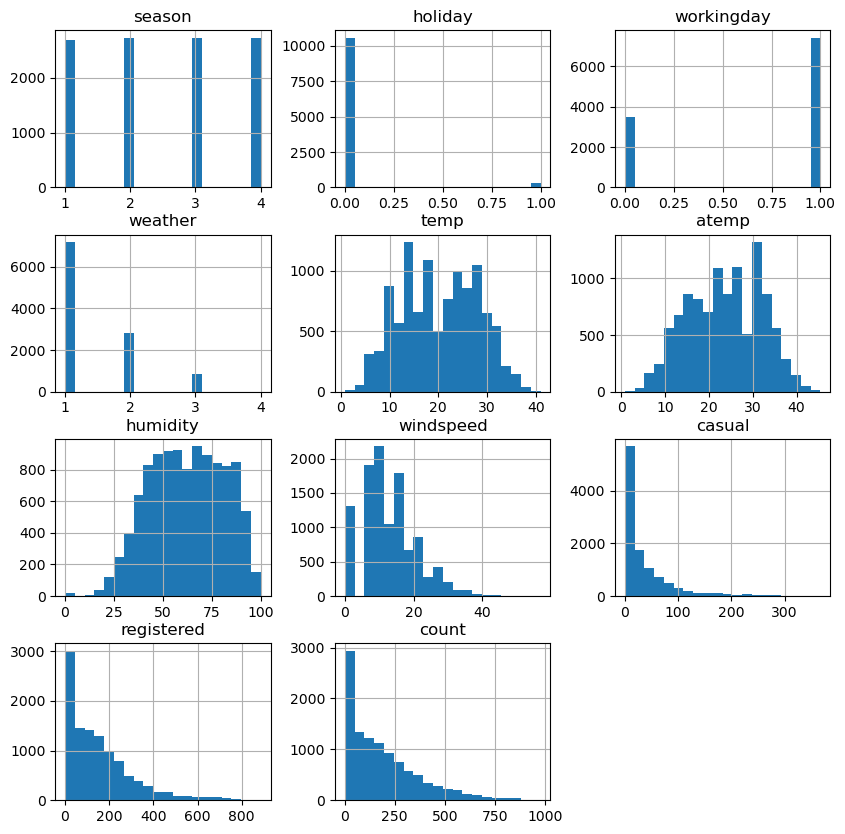

In [5]:
train.hist(bins=20,figsize=(10,10))
plt.show()

In [6]:
train['tempDate'] = train.datetime.apply(lambda x:x.split())

train['date'] = train['tempDate'].apply(lambda x: x[0])     
train['year'] = train['tempDate'].apply(lambda x: x[0].split('-')[0])
train['month'] = train['tempDate'].apply(lambda x: x[0].split('-')[1])
train['day'] = train['tempDate'].apply(lambda x: x[0].split('-')[2])
train['hour'] = train['tempDate'].apply(lambda x: x[1].split(':')[0])
train['minute'] = train['tempDate'].apply(lambda x: x[1].split(':')[1])
train['second'] = train['tempDate'].apply(lambda x: x[1].split(':')[2])
train['weekday'] = train.tempDate.apply(lambda x:calendar.day_name[datetime.strptime(x[0], "%Y-%m-%d").weekday()])

train = train.drop('tempDate', axis=1)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  date        10886 non-null  object 
 13  year        10886 non-null  object 
 14  month       10886 non-null  object 
 15  day         10886 non-null  object 
 16  hour        10886 non-null  object 
 17  minute      10886 non-null  object 
 18  second      10886 non-null  object 
 19  weekday     10886 non-nul

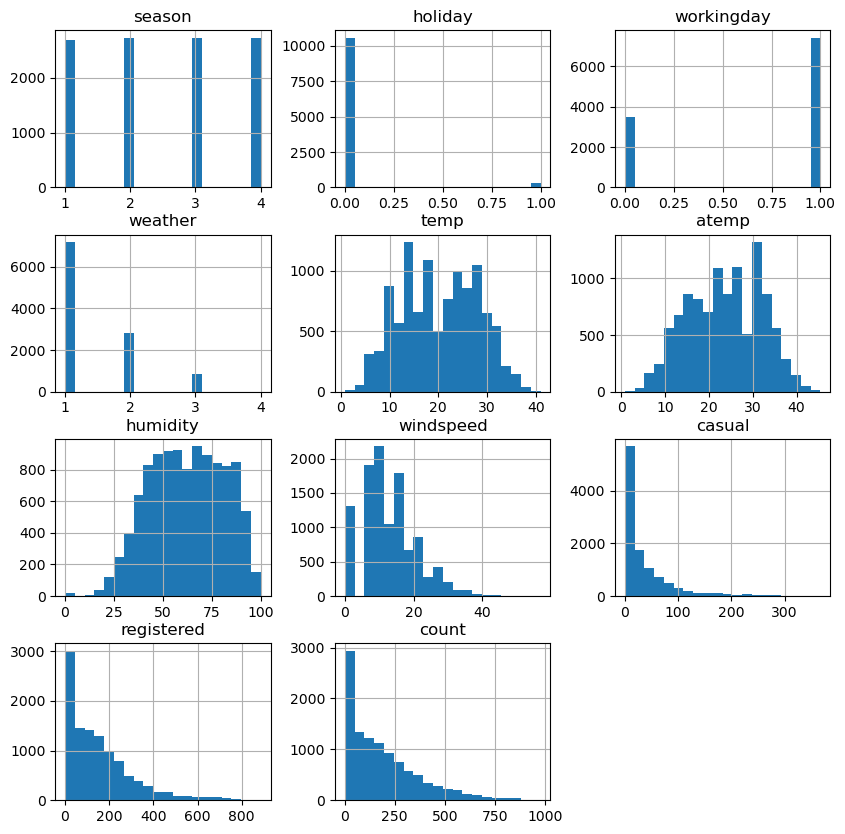

In [8]:
train.hist(bins=20,figsize=(10,10))
plt.show()

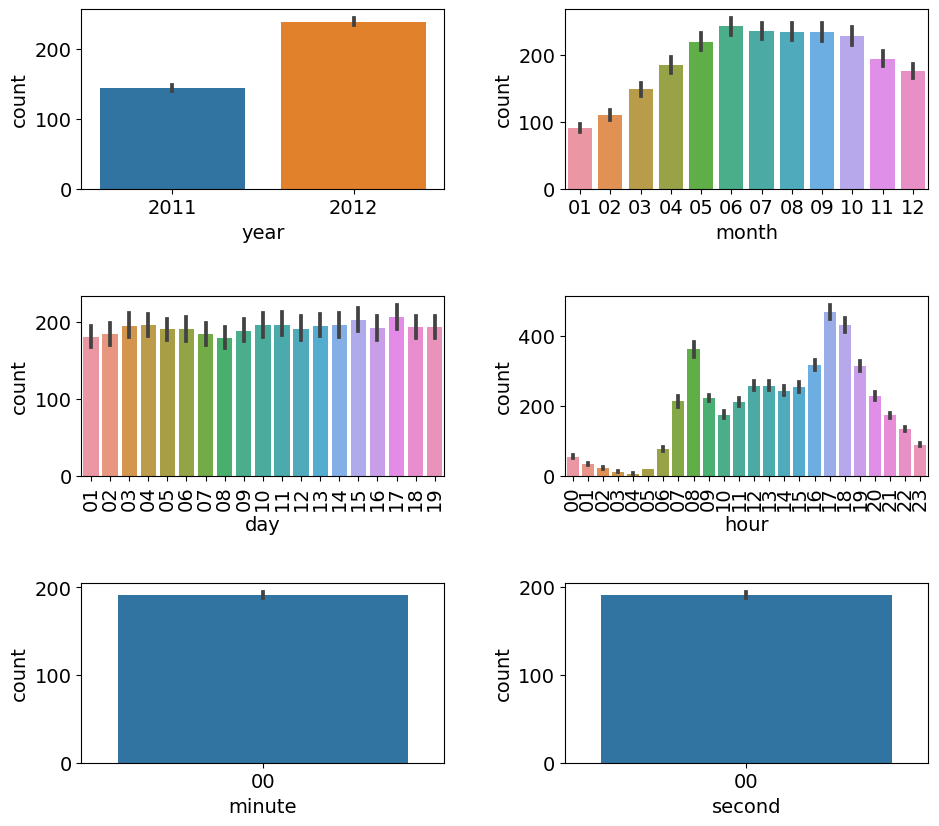

In [9]:
mpl.rc('font', size=14)
mpl.rc('axes', titlesize=5)
figure, axes = plt.subplots(nrows=3, ncols=2)
plt.tight_layout()
figure.set_size_inches(10,9)

sns.barplot(x='year', y='count', data=train, ax=axes[0, 0])
sns.barplot(x='month', y='count', data=train, ax=axes[0, 1])
sns.barplot(x='day', y='count', data=train, ax=axes[1, 0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1, 1])
sns.barplot(x='minute', y='count', data=train, ax=axes[2, 0])
sns.barplot(x='second', y='count', data=train, ax=axes[2, 1])

axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[1, 1].tick_params(axis='x', labelrotation=90)

In [10]:
train[train["weather"].eq(4)]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012-01-09,2012,01,09,18,00,00,Monday


In [11]:
#dropping data weather == 4 and ['datetime', 'season', 'workingday', 'date', 'day', 'minute', 'second']
train = train[train['weather'] != 4]
train = train.drop(['datetime', 'season', 'workingday', 'date', 'day', 'minute', 'second'], axis=1)

In [12]:
train

,holiday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,weekday
0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,01,00,Saturday
1,0,1,9.02,13.635,80,0.0000,8,32,40,2011,01,01,Saturday
2,0,1,9.02,13.635,80,0.0000,5,27,32,2011,01,02,Saturday
3,0,1,9.84,14.395,75,0.0000,3,10,13,2011,01,03,Saturday
4,0,1,9.84,14.395,75,0.0000,0,1,1,2011,01,04,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,Wednesday
10882,0,1,14.76,17.425,57,15.0013,10,231,241,2012,12,20,Wednesday
10883,0,1,13.94,15.910,61,15.0013,4,164,168,2012,12,21,Wednesday
10884,0,1,13.94,17.425,61,6.0032,12,117,129,2012,12,22,Wednesday


In [13]:
weekday_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
train['weekday'] = train['weekday'].map(weekday_mapping)

In [14]:
#separate data
df = pd.DataFrame(train)
X_train = df[['holiday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'hour','weekday']]
y_train = df[['casual', 'registered', 'count']]

In [15]:
corr_matrix = df.corr()
corr_matrix['temp'].sort_values(ascending=False)

C:\Users\admin\AppData\Local\Temp\ipykernel_7460\2180935375.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


temp          1.000000
atemp         0.984945
casual        0.467071
count         0.394476
registered    0.318608
holiday       0.000270
windspeed    -0.017973
weekday      -0.038687
weather      -0.054505
humidity     -0.064783
Name: temp, dtype: float64

array([[<Axes: xlabel='holiday', ylabel='holiday'>,
        <Axes: xlabel='weather', ylabel='holiday'>,
        <Axes: xlabel='temp', ylabel='holiday'>,
        <Axes: xlabel='atemp', ylabel='holiday'>,
        <Axes: xlabel='humidity', ylabel='holiday'>,
        <Axes: xlabel='windspeed', ylabel='holiday'>,
        <Axes: xlabel='weekday', ylabel='holiday'>],
       [<Axes: xlabel='holiday', ylabel='weather'>,
        <Axes: xlabel='weather', ylabel='weather'>,
        <Axes: xlabel='temp', ylabel='weather'>,
        <Axes: xlabel='atemp', ylabel='weather'>,
        <Axes: xlabel='humidity', ylabel='weather'>,
        <Axes: xlabel='windspeed', ylabel='weather'>,
        <Axes: xlabel='weekday', ylabel='weather'>],
       [<Axes: xlabel='holiday', ylabel='temp'>,
        <Axes: xlabel='weather', ylabel='temp'>,
        <Axes: xlabel='temp', ylabel='temp'>,
        <Axes: xlabel='atemp', ylabel='temp'>,
        <Axes: xlabel='humidity', ylabel='temp'>,
        <Axes: xlabel='windspeed'

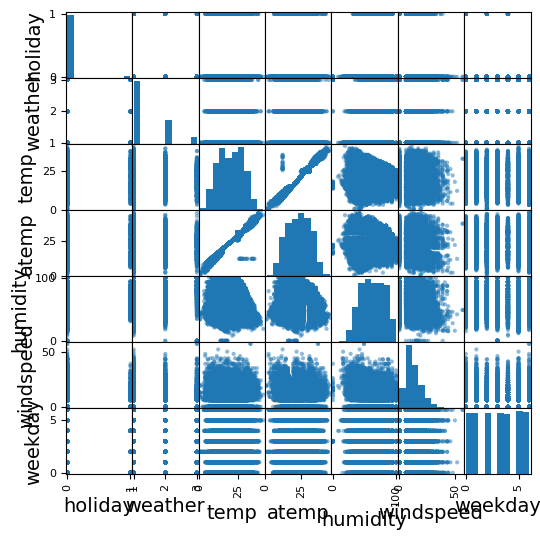

In [16]:
#visualize
scatter_matrix(X_train, figsize=(6,6))

array([[<Axes: xlabel='casual', ylabel='casual'>,
        <Axes: xlabel='registered', ylabel='casual'>,
        <Axes: xlabel='count', ylabel='casual'>],
       [<Axes: xlabel='casual', ylabel='registered'>,
        <Axes: xlabel='registered', ylabel='registered'>,
        <Axes: xlabel='count', ylabel='registered'>],
       [<Axes: xlabel='casual', ylabel='count'>,
        <Axes: xlabel='registered', ylabel='count'>,
        <Axes: xlabel='count', ylabel='count'>]], dtype=object)

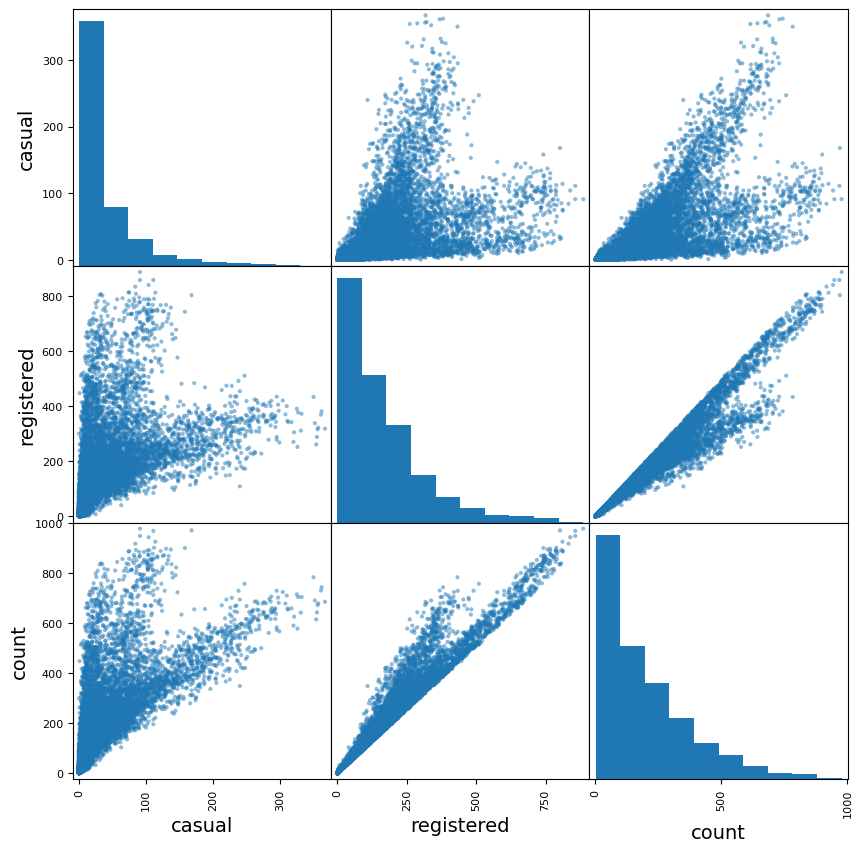

In [17]:
attributes2 = ['casual', 'registered', 'count']
scatter_matrix(df[attributes2], figsize=(10,10))

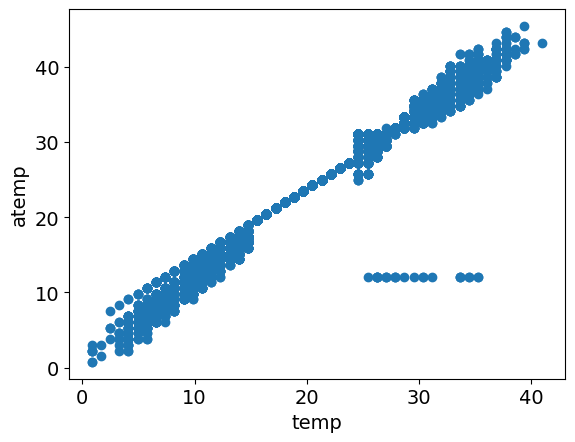

In [18]:
plt.scatter(X_train['temp'],X_train['atemp'])
plt.xlabel('temp')
plt.ylabel('atemp')
plt.show()

In [19]:
X_train_atemp = X_train[(X_train.atemp>=20) | (X_train.temp<=20)]
X_train_atemp['atemp']

0        14.395
1        13.635
2        13.635
3        14.395
4        14.395
          ...  
10881    19.695
10882    17.425
10883    15.910
10884    17.425
10885    16.665
Name: atemp, Length: 10861, dtype: float64

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_atemp[['temp']], X_train_atemp[['atemp']])
lin_reg.intercept_, lin_reg.coef_

(array([1.87020695]), array([[1.07918204]]))

In [21]:
condition = (X_train.atemp < 20) & (X_train.temp > 20)
X_train.loc[condition, "atemp"] = X_train.loc[condition, "temp"] * lin_reg.coef_[0][0] + lin_reg.intercept_[0]

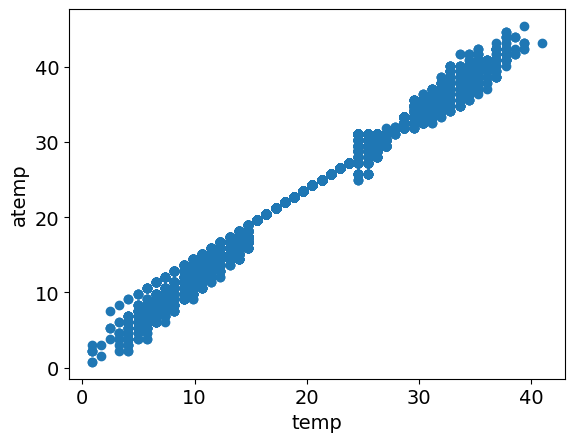

In [22]:
plt.scatter(X_train['temp'],X_train['atemp'])
plt.xlabel('temp')
plt.ylabel('atemp')
plt.show()

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

rnd_rgs = RandomForestRegressor(n_estimators=100, n_jobs=-1, max_leaf_nodes=100,random_state=42)

condition = (X_train.windspeed != 0)
rnd_rgs.fit(X_train.loc[condition,['temp','atemp','humidity']],X_train.loc[condition,'windspeed'])
condition = (X_train.windspeed == 0)
X_train.loc[condition,'windspeed'] = rnd_rgs.predict(X_train.loc[condition,['temp','atemp','humidity']])

In [24]:
X_train['windspeed'].value_counts()

8.998100     1120
11.001400    1057
12.998000    1042
7.001500     1034
15.001300     961
             ... 
16.677724       1
14.440672       1
15.771830       1
14.060312       1
9.191849        1
Name: windspeed, Length: 443, dtype: int64

In [25]:
rnd_rgs = RandomForestRegressor(n_estimators=100, n_jobs=-1, max_leaf_nodes=100,random_state=42)

rnd_rgs.fit(X_train[['temp','atemp','windspeed']],X_train['humidity'])
condition = (X_train.humidity == 0)
X_train.loc[condition,'humidity'] = rnd_rgs.predict(X_train.loc[condition,['temp','atemp','windspeed']])

In [26]:
X_train['humidity'].value_counts()

88.000000    368
94.000000    324
83.000000    316
87.000000    289
70.000000    259
            ... 
60.003469      1
55.574807      1
58.594320      1
60.873273      1
91.000000      1
Name: humidity, Length: 106, dtype: int64

In [27]:
X_train

,holiday,weather,temp,atemp,humidity,windspeed,year,month,hour,weekday
0,0,1,9.84,14.395,81.0,7.910587,2011,01,00,5
1,0,1,9.02,13.635,80.0,7.948157,2011,01,01,5
2,0,1,9.02,13.635,80.0,7.948157,2011,01,02,5
3,0,1,9.84,14.395,75.0,7.910587,2011,01,03,5
4,0,1,9.84,14.395,75.0,7.910587,2011,01,04,5
...,...,...,...,...,...,...,...,...,...,...
10881,0,1,15.58,19.695,50.0,26.002700,2012,12,19,2
10882,0,1,14.76,17.425,57.0,15.001300,2012,12,20,2
10883,0,1,13.94,15.910,61.0,15.001300,2012,12,21,2
10884,0,1,13.94,17.425,61.0,6.003200,2012,12,22,2


In [28]:
'''#prepare the data
#onehot
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
season_1hot = encoder.fit_transform(df[['season', 'weather']])'''
'''from sklearn.preprocessing import StandardScaler

#features = ['time_since_start', -'season', 'holiday', 'workingday', -'weather', 'temp', 'atemp', 'humidity', 'windspeed']

std_scaler = StandardScaler()
rest_std_scaled = std_scaler.fit_transform(df[['time_since_start', 'holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed']])'''
'''A = [season_1hot, rest_std_scaled]'''

'A = [season_1hot, rest_std_scaled]'

In [29]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
X_train_1hot = encoder.fit_transform(X_train[['year', 'month','hour','weekday','holiday','weather']])

In [30]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
rest_std_scaled = std_scaler.fit_transform(X_train[['temp', 'atemp', 'humidity', 'windspeed']])

In [31]:
from sklearn.compose import ColumnTransformer

num_attributes = ['temp', 'atemp', 'humidity', 'windspeed']
cat_attributes = ['year', 'month','hour','weekday','holiday','weather']

full_pipeline = ColumnTransformer([('num', StandardScaler(), num_attributes), ('cat', OneHotEncoder(), cat_attributes)],)
X_train_final = full_pipeline.fit_transform(X_train)

In [32]:
X_train_final
y_train_final = y_train
#y_train_final = std_scaler.fit_transform(y_train)

In [33]:
#data setting finished

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_final, y_train, test_size=0.1, random_state=42)

In [35]:
'''rnd_rgs = RandomForestRegressor(n_estimators=100, n_jobs=-1, max_leaf_nodes=100,random_state=42)
rnd_rgs.fit(X_train, y_train)'''

'rnd_rgs = RandomForestRegressor(n_estimators=100, n_jobs=-1, max_leaf_nodes=100,random_state=42)\nrnd_rgs.fit(X_train, y_train)'

In [36]:
rnd_rgs = RandomForestRegressor(n_estimators=100, n_jobs=-1,random_state=42)
rnd_rgs.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [37]:
A = rnd_rgs.predict(X_train)

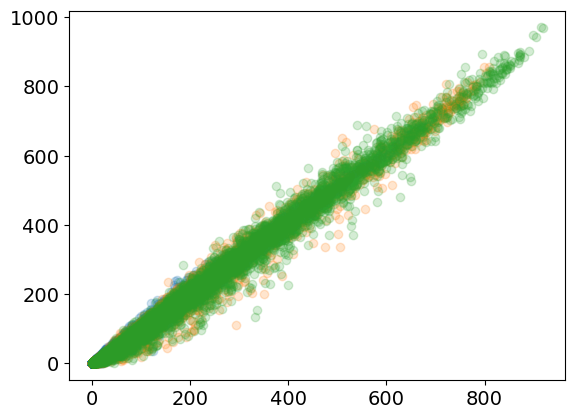

In [38]:
b0 = np.array(A).T[0]
b1 = np.array(A).T[1]
b2 = np.array(A).T[2]
plt.scatter(b0,y_train['casual'], alpha = 0.2)
plt.scatter(b1,y_train['registered'], alpha = 0.2)
plt.scatter(b2,y_train['count'], alpha = 0.2)

plt.show()

In [39]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train,A))

236.09832315755406


In [40]:
A = rnd_rgs.predict(X_val)

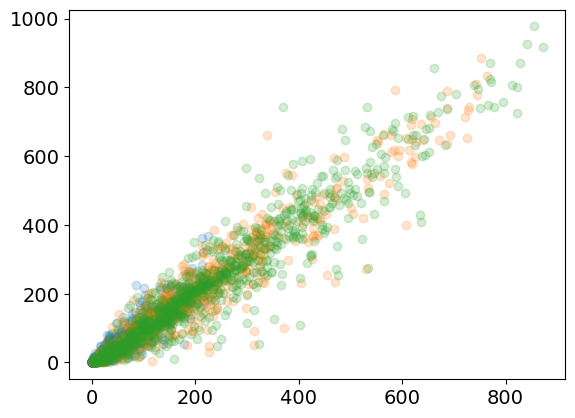

In [41]:
b0 = np.array(A).T[0]
b1 = np.array(A).T[1]
b2 = np.array(A).T[2]
plt.scatter(b0,y_val['casual'], alpha = 0.2)
plt.scatter(b1,y_val['registered'], alpha = 0.2)
plt.scatter(b2,y_val['count'], alpha = 0.2)

plt.show()

In [42]:
for i in range(10):
    print(b2[i]-b1[i]-b0[i])

7.105427357601002e-15
5.329070518200751e-15
-4.440892098500626e-16
0.0
8.881784197001252e-16
-2.842170943040401e-14
7.105427357601002e-15
2.842170943040401e-14
7.105427357601002e-14
3.552713678800501e-15


In [43]:
mean_squared_error(y_val,A)

1725.4376875330017

In [44]:
mean_squared_error(y_val['count'],b2)

2834.3503785373964

In [45]:
import numpy as np
def rmsle_score(preds, true):
    rmsle_score = (np.sum((np.log1p(preds)-np.log1p(true))**2)/len(true))**0.5
    return rmsle_score

from sklearn.metrics import make_scorer
RMSLE = make_scorer(rmsle_score)

In [46]:
rmsle_score(b2,y_val['count'])

0.44477252086549357

In [47]:
y_val, A

(       casual  registered  count
 3133       29          98    127
 5786        0          13     13
 7459        0           2      2
 8953       70         163    233
 10241       1           3      4
 ...       ...         ...    ...
 6886        8         118    126
 4317       27         120    147
 1373        5          19     24
 5399        3           8     11
 2312       11          17     28
 
 [1089 rows x 3 columns],
 array([[ 41.65,  93.15, 134.8 ],
        [  2.51,  65.69,  68.2 ],
        [  1.1 ,   6.21,   7.31],
        ...,
        [  3.2 ,  20.35,  23.55],
        [  1.39,  17.87,  19.26],
        [ 38.53,  90.73, 129.26]]))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# RandomForestRegressor를 위한 매개변수 그리드 정의
param_dist = {
    'n_estimators': [100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': randint(100, 300),
    'min_samples_split': randint(2, 50),
    'min_samples_leaf': randint(1, 50),
    'bootstrap': [True, False]
}

# RandomForestRegressor 모델 생성
#rf_model = RandomForestRegressor()
#rnd_rgs
# RandomizedSearchCV를 통해 무작위 검색 수행
random_search = RandomizedSearchCV(
    rnd_rgs, 
    param_distributions=param_dist, 
    n_iter=100,  # 총 시도 횟수
    cv=5,       # 교차 검증의 폴드 수
    scoring=RMSLE,  # 평가 지표 (회귀 문제에서는 주로 평균 제곱 오차의 음수를 사용)
    random_state=42,  # 무작위성 제어를 위한 시드
    n_jobs=-1  # 병렬 처리를 위한 CPU 코어 수
)

# 데이터에 모델을 적용
random_search.fit(X_train, y_train['count'])

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", random_search.best_params_)

In [ ]:
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_val)
mse = mean_squared_error(y_val['count'], y_pred)
mse

In [ ]:
rmsle_score(y_pred,y_val['count'])

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
lModel = LinearRegression()
lModel.fit(X = X_train,y = y_train)
preds = lModel.predict(X = X_train)
print(mean_squared_error(y_train, preds))
preds = lModel.predict(X = X_val)
print(mean_squared_error(y_val, preds))

In [ ]:
from sklearn.model_selection import GridSearchCV
ridge_m_ = Ridge()
ridge_params_ = { 'max_iter':[3000],'alpha':[0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000]}
grid_ridge_m = GridSearchCV( ridge_m_,
                          ridge_params_,
                          scoring = "neg_mean_squared_error",
                          cv=5)

In [ ]:
grid_ridge_m.fit(X_train, y_train)
preds = grid_ridge_m.predict(X = X_train)
print(mean_squared_error(y_train, preds))
preds = grid_ridge_m.predict(X = X_val)
print(mean_squared_error(y_val, preds))

In [ ]:
lasso_m_ = Lasso()
alpha  = 1/np.array([0.1, 1, 2, 3, 4, 10, 30,100,200,300])
lasso_params_ = { 'max_iter':[3000],'alpha':alpha}
grid_lasso_m = GridSearchCV( lasso_m_,lasso_params_,
                            scoring = 'neg_mean_squared_error',cv=5)

In [ ]:
grid_lasso_m.fit(X_train, y_train)
preds = grid_lasso_m.predict(X = X_train)
print(mean_squared_error(y_train, preds))
preds = grid_lasso_m.predict(X = X_val)
print(mean_squared_error(y_val, preds))